In [6]:
from SeleniumScrap import TwitterScraper
import os
from dotenv import load_dotenv
import pandas as pd
#-------------------------------------------MAIN----------------------------------------------------
load_dotenv()
# Récupérer les variables d'environnement
email=os.getenv("EMAIL_ADDRESS")
phone=os.getenv("PHONE_NUMBER")
password=os.getenv("PASSWORD")

tweet = "Exemple de tweet"
word = "climate change"
print(word)
languages = ["fr", "es"] 

# Créer une instance de TwitterScraper et utiliser les fonctions de la classe
time_proccedding = 50
scraper = TwitterScraper(email, password, phone,time_proccedding,rotating_ip=False,ip_search=False)

dataframes_list = []

# Traitez chaque année et ajoutez le DataFrame résultant à la liste
for year in [2020, 2021, 2022, 2023, 2024]:
    dataframe_foodwaste = scraper.process_with_word(word, languages, year)
    dataframes_list.append(dataframe_foodwaste)

# Concaténer tous les DataFrames
final_dataframe_foodwaste = pd.concat(dataframes_list, ignore_index=True)


# scraper.getComments(tweet,'en')


#---------------------------------------------------------------------------------------------------------------

climate change


KeyboardInterrupt: 

In [20]:
# Afficher ou utiliser le DataFrame final
print(final_dataframe_foodwaste)
print(word)

                                                 tweet  \
0    Together, we’re going to tackle the threat of ...   
1    From the economy to criminal justice to climat...   
2    Why are you voting in Georgia’s January 5 runo...   
3    Nothing will fundamentally change under Presid...   
4    Climate  change is an existential crisis. Life...   
..                                                 ...   
262                                   Climate  change    
263                                    Climate  Change   
264                                    climate  change   
265                                    climate  change   
266                                    Climate  change   

                         date  comments  shares    likes  views language  
0    2020-12-20T00:54:00.000Z    2000.0  2000.0  25000.0    NaN       en  
1    2020-12-16T03:26:00.000Z    2000.0  3000.0  26000.0    NaN       en  
2    2020-12-03T22:01:19.000Z     422.0  3000.0  14000.0    NaN       en  
3  

In [1]:
#Wordclouds per language

import nltk
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import re
from translate import Translator

# Téléchargement des mots vides pour la première exécution
nltk.download('stopwords')

def clean_word(word):
    """Nettoyer les mots en retirant la ponctuation."""
    return re.sub(r'[^\w\s]', '', word).lower()

# Charger les mots vides pour le français, l'espagnol et l'anglais
stop_words_fr = set(stopwords.words('french'))
stop_words_es = set(stopwords.words('spanish'))
stop_words_en = set(stopwords.words('english'))

# Mots vides personnalisés
stop_words_personal = 'food waste climate change climat climatechange https http com www twitter pic status co amp www youtube foodwaste'
stop_words_personal_set = set(stop_words_personal.split())


# Traduire les mots vides personnalisés pour chaque langue
translated_stop_words = {}

for language in languages:
    translated_words = []
    for word in stop_words_personal.split():
        translator = Translator(to_lang=language)
        translated_word = translator.translate(word)
        translated_words.append(translated_word)
        
    translated_stop_words[language] = set(translated_words)
    print(f"Translated stop words for {language}: {translated_stop_words[language]}")

# Fusionner tous les ensembles de mots vides pour obtenir un ensemble unique
stop_words = stop_words_personal_set.union(stop_words_fr).union(stop_words_es).union(stop_words_en)
for lang_translated_stop_words in translated_stop_words.values():
    stop_words = stop_words.union(lang_translated_stop_words)

# Dictionnaire pour stocker la fréquence des mots pour chaque langue
word_freq = {'en': {}}  # Dictionnaire pour l'anglais
word_freq.update({lang: {} for lang in languages})  # Ajoutez des dictionnaires vides pour chaque langue

# Boucle sur chaque tweet pour calculer la fréquence des mots
for index, row in dataframe_foodwaste.iterrows():
    tweet = row['tweet']
    language = row['language']
    
    words = tweet.split()
    for word in words:
        word = clean_word(word)
        if word not in stop_words and word != '':
            word_freq[language][word] = word_freq[language].get(word, 0) + 1

# Créer des nuages de mots pour chaque langue

for language in word_freq:
  
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq[language])
    plt.figure(figsize=(10, 5))
    plt.title(f"Word Cloud for {language.upper()}")
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\theoh\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


NameError: name 'languages' is not defined

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\theoh\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


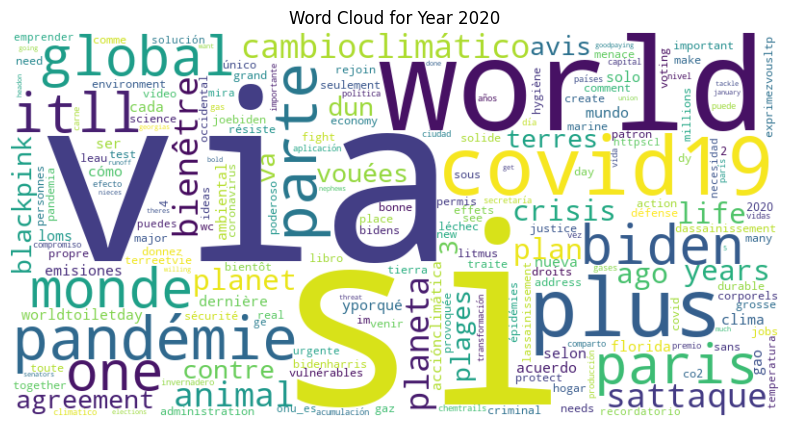

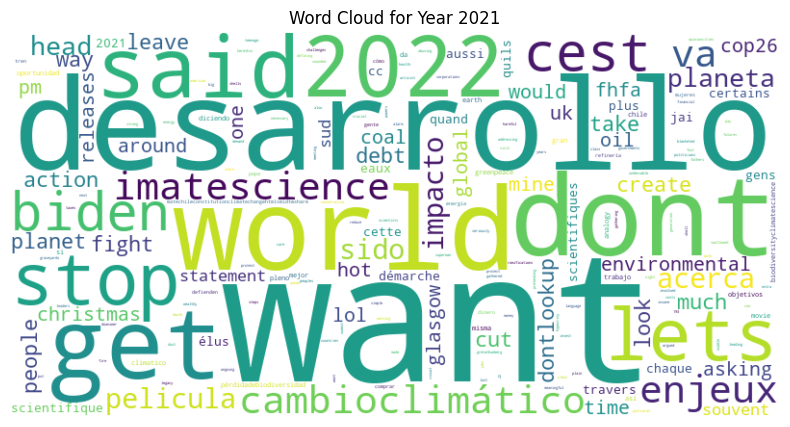

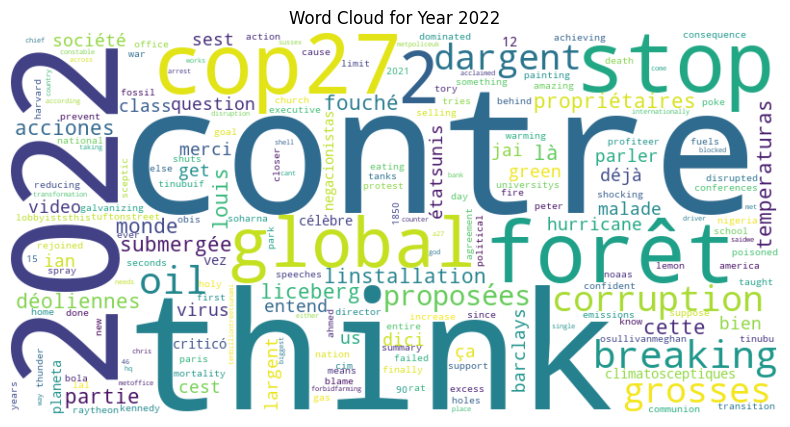

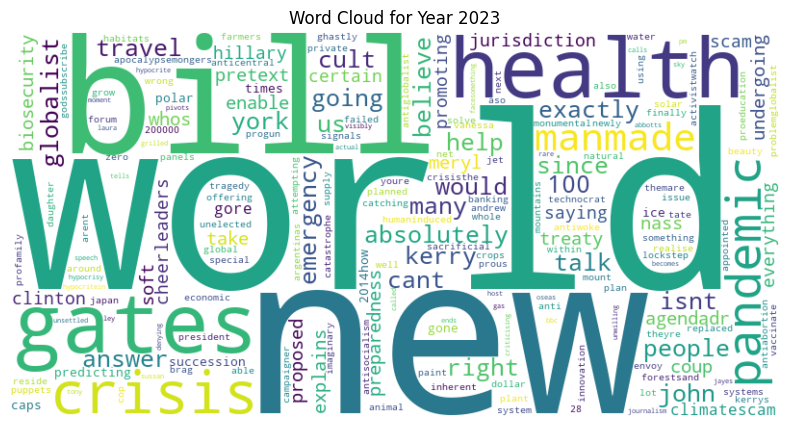

In [22]:
import nltk
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import re
from translate import Translator

# Téléchargement des mots vides pour la première exécution
nltk.download('stopwords')

def clean_word(word):
    """Nettoyer les mots en retirant la ponctuation."""
    return re.sub(r'[^\w\s]', '', word).lower()

# Charger les mots vides pour le français, l'espagnol et l'anglais
stop_words_fr = set(stopwords.words('french'))
stop_words_es = set(stopwords.words('spanish'))
stop_words_en = set(stopwords.words('english'))

# Mots vides personnalisés
stop_words_personal = '''food waste climate change climat climatechange https http com www twitter pic status co amp www youtube foodwaste
climatique changement climatique alimentaire déchets alimentaires comida residuos cambio climático alimentación'''
stop_words_personal_set = set(stop_words_personal.split())

# Fusionner tous les ensembles de mots vides pour obtenir un ensemble unique
stop_words = stop_words_personal_set.union(stop_words_fr).union(stop_words_es).union(stop_words_en)

    
    
# Ajouter une colonne 'year' au DataFrame
final_dataframe_foodwaste['year'] = final_dataframe_foodwaste['date'].apply(lambda x: x.split('-')[0])

# Dictionnaire pour stocker la fréquence des mots pour chaque année
word_freq_year = {}

# Boucle sur chaque tweet pour calculer la fréquence des mots par année
for index, row in final_dataframe_foodwaste.iterrows():
    tweet = row['tweet']
    year = row['year']
    
    if year not in word_freq_year:
        word_freq_year[year] = {}
    
    words = tweet.split()
    for word in words:
        word = clean_word(word)
        if word not in stop_words and word != '':
            word_freq_year[year][word] = word_freq_year[year].get(word, 0) + 1

# Créer des nuages de mots pour chaque année
for year in word_freq_year:
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq_year[year])
    plt.figure(figsize=(10, 5))
    plt.title(f"Word Cloud for Year {year}")
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()
